In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.neighbors import DistanceMetric
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### Добавление датасета в Юпитер

In [2]:
df = pd.read_csv('4heart2.csv', delimiter = ',')

# Предварительная обработка данных

#### Вывод первых 20 строк датасета

In [3]:
df.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


#### Вывод столбцов датасета

In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

#### Перевод столбцов в нижний регистр

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

#### Проверка на пустые строки. 
Так как пустые строки отсутствуют, то оставляем все как есть

In [7]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

#### Проверка на наличие явных дубликатов. 
Явные дубликаты также отсутствуют

In [8]:
df.duplicated().sum()

0

#### Проверка на наличие неявных дубликатов.
В столбце возраст было найдено десятичное число, оно было заменено на целое, так как возраст не может быть выражен десятичным числом

In [9]:
df['age'].unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

In [10]:
df.loc[df['age']== 60.667, 'age'] = 70

In [11]:
df['age'].unique()

array([75., 55., 65., 50., 90., 60., 80., 62., 45., 49., 82., 87., 70.,
       48., 68., 53., 95., 58., 94., 85., 69., 72., 51., 57., 42., 41.,
       67., 79., 59., 44., 63., 86., 66., 43., 46., 61., 81., 52., 64.,
       40., 73., 77., 78., 54., 47., 56.])

Изменяем тип данных у столбца с возрастом на целочисленный

In [12]:
df[['age']] = df[['age']].astype(np.int64)

#### Выводим информацию о датасете. 
По представленным данным можно увидеть, что датасет включает в себя 13 солбцов и 299 значений, значения platelets и serum_creatinine являются вещественными, остальнве значения являются целочисленными

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


#### Описание датасета. 
По полученным данным можно увидеть, что средний возраст пациентов с заболеванием сердца составляет около 60 лет, минимальный возраст составляет 40 лет, а максимальный 95.

In [14]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.896321,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.918316,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Ход работы

#### Разбиение набора данных на тренировочный и тестовый датасеты с помощью train_test_split. 
В датасете целевым признаком является - death_event.

In [15]:
firstDF, secondDF = train_test_split(df, shuffle=False)
Y_true = firstDF['death_event']
X = firstDF.drop(['death_event'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(Y_true, X, random_state=0)

#### Разработка предсказательной модели качественного отклика методом k-ближайших соседей

In [16]:
modelNearNeigh = KNeighborsClassifier()
modelNearNeigh.fit(X, Y_true)
Y_pred = modelNearNeigh.predict(X)
print(Y_pred)

[1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0
 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0
 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1
 0 0]


#### Подсчет метрик "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score'


In [17]:
print(accuracy_score(Y_true, Y_pred))
print(precision_score(Y_true, Y_pred, average='micro'))
print(recall_score (Y_true, Y_pred, average='micro'))
print(f1_score(Y_true, Y_pred, average='micro'))
print(roc_auc_score(Y_true, Y_pred))

0.7053571428571429
0.7053571428571429
0.7053571428571429
0.7053571428571429
0.6725955204216073


Среднее значение по данным метрикам около 70%

#### Построение матрицы неточностей с помощью confusion_matrix

[113  19  47  45]


<AxesSubplot:>

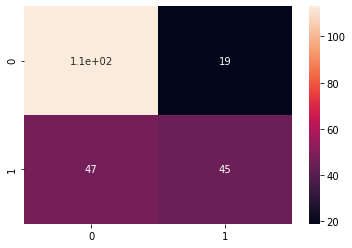

In [18]:
cm = confusion_matrix(Y_true,Y_pred)
tn, fp, fn, tp =  cm.ravel()
print(cm.ravel())
sns.heatmap(cm, annot=True)

Наибольшее количества вышло у true_Negative значение, второй по величине false_Negative

#### Разработка предсказательной модели качественного отклика методом логистической регрессии

In [19]:
modelLogReg = LogisticRegression(random_state=0)
modelLogReg.fit(X, Y_true)
Y_pred = modelLogReg.predict(X)
print(Y_pred)

[1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


#### Подсчет метрик "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score'

In [20]:
print(accuracy_score(Y_true, Y_pred))
print(precision_score(Y_true, Y_pred, average='micro'))
print(recall_score (Y_true, Y_pred, average='micro'))
print(f1_score(Y_true, Y_pred, average='micro'))
print(roc_auc_score(Y_true, Y_pred))

0.7901785714285714
0.7901785714285714
0.7901785714285714
0.7901785714285714
0.7758563899868247


Среднее значение по данным метрикам около 79%

#### Построение матрицы неточностей с помощью confusion_matrix


[113  19  28  64]


<AxesSubplot:>

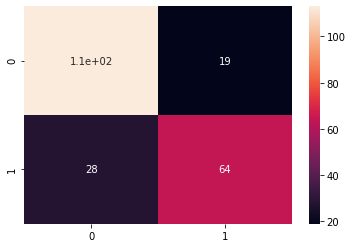

In [21]:
cm = confusion_matrix(Y_true,Y_pred)
tn, fp, fn, tp =  cm.ravel()
print(cm.ravel())
sns.heatmap(cm, annot=True)

Наибольшее количества вышло у true_Negative значение, второй по величине true_Positive

#### Разработка предсказательной модели качественного отклика методом случайного леса

In [22]:
modelRandForest = RandomForestClassifier(random_state=0)
modelRandForest.fit(X, Y_true)
Y_pred = modelRandForest.predict(X)
print(Y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0]


#### Подсчет метрик "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score'

In [23]:
print(accuracy_score(Y_true, Y_pred))
print(precision_score(Y_true, Y_pred, average='micro'))
print(recall_score (Y_true, Y_pred, average='micro'))
print(f1_score(Y_true, Y_pred, average='micro'))
print(roc_auc_score(Y_true, Y_pred))

1.0
1.0
1.0
1.0
1.0


Среднее значение по данным метрикам около 100%

#### Построение матрицы неточностей с помощью confusion_matrix

[132   0   0  92]


<AxesSubplot:>

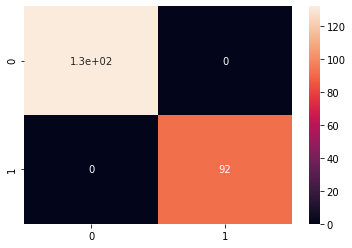

In [24]:
cm = confusion_matrix(Y_true,Y_pred)
tn, fp, fn, tp =  cm.ravel()
print(cm.ravel())
sns.heatmap(cm, annot=True)

Наибольшее количества вышло у true_Negative значение, второй по величине true_Positive
Также можно сделать вывод, что при отсутствии false - значений модель отработала без ошибок

#### Построение графика ROC-кривой
На данном графике можно наглядно увидеть разницу между моделями

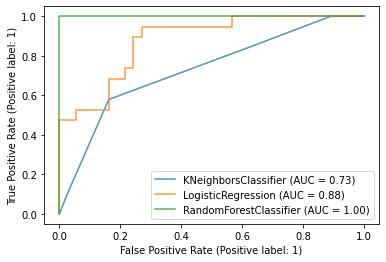

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_true, random_state=0)
ax = plt.gca()
nearNeigh_disp = plot_roc_curve(modelNearNeigh, X_test, y_test, ax=ax, alpha=0.8)
logReg_disp = plot_roc_curve(modelLogReg, X_test, y_test, ax=ax, alpha=0.8)
randForest_disp = plot_roc_curve(modelRandForest, X_test, y_test, ax=ax, alpha=0.8)

Исходя их графика можно сделать вывод, что на первом месте метод случайного леса, на втором месте метод логистической регрессии, на последнем k-случайных соседей

# Вывод
В ходе выполнения работы была выполнена предварительная обработка данных, произведено разбиение набора данных на тренировочный и тестовый, была разработана предсказательная модель качественного отклика методами: k-ближайших соседей, логистической регрессии и случайным лесом. Также для каждого из этих методов была посчитана метрика, построена матрица неточностей и построена тепловая диаграмма. Был построен график ROC-кривой на основе всех предложенных методов.